# Introduction to Deep Learning Using Keras

[Keras](https://keras.io/) is a high-level API for deep learning. It is written in Python and can run on top of [Theano](http://deeplearning.net/software/theano/) or [TensorFlow](https://www.tensorflow.org/), two very popular libraries for neural networks in Python. It allows users to implement deep learning models very fast and with minimum effort. In the past years, the contribution of Keras to research in deep learning has been significant since it has allowed researchers to go from ideas to results with the least possible delay.



In this part of the lab, we will implement a simple feedforward neural network to perform classification on a synthetic dataset. Your first objective is to create a toy dataset. The dataset will consist of 200 points in the 2-dimensional space (N = 200, d = 2). Each point will belong either to class 0 or to class 1. Each class will contain exactly 100 points. For class 0, points will be drawn from a Gaussian distribution with mean [1,1] and standard deviation 0.5. For class 1, points will be drawn from a Gaussian distribution with mean [-1,-1] and standard deviation 0.5. To generate these values make use of the [`randn`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) function of NumPy that returns a sample from the "standard normal" distribution as follows: 

```python
sigma * np.random.randn(...) + mu
```

In [1]:
import numpy as np

N = 200
d = 2
num_classes = 2

X = np.zeros((N, d))
y = np.zeros(N)

mu = [1, 1]
sigma = 0.9

X[:N//2,:] = sigma * np.random.randn(N//2, 2) + mu
y[:N//2] = np.zeros(N//2)

mu = [-1, -1]
sigma = 0.9

X[N//2:,:] = sigma * np.random.randn(N//2, 2) + mu
y[N//2:] = np.ones(N//2)

After generating the 200 points, plot them in a 2-dimensional plane using [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). Use the same color for points belonging to the same class.

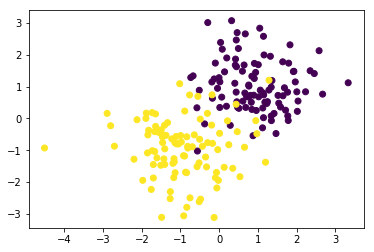

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y)

Then, split the dataset into a training and a test set using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of scikit-learn. Set the proportion of the dataset to be included in the test set to 0.2.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now you will use Keras to implement a simple feedforward neural network. In Keras, of particular importance is the notion of a model. The model is the data structure upon which the neural network is built. The most common type of model is the Sequential model, which corresponds to a linear stack of layers. We next initialize a Sequential model.

In [4]:
import keras
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


After creating a Sequence, we can add layers to it. In this example, we will add a hidden layer and the output layer. The hidden layer will consist of 64 hidden units and the output of each neuron will be activated by the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation function. The output layer will contain 1 neuron which corresponds to the probability that an instance belongs to class 1 of our problem. 
Both these layers are fully-connected neural network layers and can be implemented using the [Dense](https://keras.io/layers/core/#dense) class of Keras.

In [5]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_shape=(d,)))
model.add(Dense(units=1, activation='sigmoid'))

After defining the model, we compile it to configure its learning process. More specifically, we can specify the loss function and the optimizer and its parameters.

In [6]:
model.compile(loss=keras.losses.binary_crossentropy, 
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


Once compiled, we can train the model by iterating on the training data in batches.

In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
160/160 [==============================] - 0s 626us/step - loss: 0.7130
Epoch 2/5
160/160 [==============================] - 0s 104us/step - loss: 0.4786
Epoch 3/5
160/160 [==============================] - 0s 164us/step - loss: 0.3272
Epoch 4/5
160/160 [==============================] - 0s 182us/step - loss: 0.2535
Epoch 5/5
160/160 [==============================] - 0s 183us/step - loss: 0.2230


Once trained, we can use our model to generate predictions on new data. Predictions are real values between 0 and 1. Set predictions larger than 0.5 to 1 and predictions smaller than 0.5 to 0.

In [9]:
y_pred = model.predict(X_test, batch_size=10)

for i in range(y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

Finally, we will calculate the accuracy of the model by comparing the predictions against the ground truth class labels. Use the [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function of scikit-learn to compute the accuracy.

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy:", 100*accuracy_score(y_test, y_pred))

Accuracy: 97.5


Increase the standard deviation of the Gaussian distribution from which the datapoints are drawn. How does that affect the performance of the feedforward neural network?